In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [4]:
lista = [f'https://www.gulfood.com/exhibitors?page={i}'+'&sortby=title%20asc&azLetterField=' for i in range(1, 39)]

In [5]:
exhibitors_data = []
for i in lista:
    response = requests.get(i, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    for item in soup.find_all('li', class_='m-exhibitors-list__items__item'):
        name_tag = item.find('h2', class_='m-exhibitors-list__items__item__name')
        name = name_tag.a.text.strip() if name_tag and name_tag.a else 'N/A'

        hall_tag = item.find('div', class_='m-exhibitors-list__items__item__hall')
        hall = hall_tag.text.strip() if hall_tag else 'N/A'

        stand_tag = item.find('div', class_='m-exhibitors-list__items__item__stand')
        stand = stand_tag.text.strip() if stand_tag else 'N/A'

        country_tag = item.find('div', class_='m-exhibitors-list__items__item__location')
        country = country_tag.text.strip() if country_tag else 'N/A'

        href_tag = item.find('a', class_='m-exhibitors-list__items__item__name__link')
        href = href_tag.get('href', '') if href_tag else ''
    
        href_extracted = href.split("'")[1] if "'" in href else 'N/A'

        full_url = f'https://www.gulfood.com/{href_extracted}' if href_extracted != 'N/A' else 'N/A'

        exhibitors_data.append({'Name': name, 'Hall': hall, 'Stand': stand, 'Country': country, 'www_1': full_url})

df = pd.DataFrame(exhibitors_data)

In [6]:
df = df.iloc[1:]

In [8]:
websites = []

**U W A G A !!! CZAS WYKONANIA OKOŁO GODZINY**  Внимание! Срок выполнения кода около часа

In [9]:
for i in df['www_1']:
    try:
        response = requests.get(i)
        soup = BeautifulSoup(response.content, 'html.parser')
        website_div = soup.find('div', class_='m-exhibitor-entry__item__body__contacts__additional__website')
        website_url = website_div.a['href'] if website_div and website_div.a else 'No URL Found'
    except:
        website_url = website_div.a['href'] if website_div and website_div.a else 'No URL Found'

    websites.append(website_url)

In [10]:
df['WWW'] = websites

In [11]:
df

,Name,Hall,Stand,Country,www_1,WWW
1,' Energy Sugar Company,Trade Centre Arena,S-J11,Brazil,https://www.gulfood.com/exhibitorslist-2024/en...,https://www.energy.com.br/en
2,""" Al Nejmah Sweets"" Ramadan Abu Lebbeh & Sons ...",Shk Rashid Hall,R-130,Jordan,https://www.gulfood.com/exhibitorslist-2024/al...,https://alnejmahbayader.eshopshub.com/alnejmah...
3,""" Brivais Vilnis "" JSC",Trade Centre Arena,S-H7,Latvia,https://www.gulfood.com/exhibitorslist-2024/br...,http://www.brivaisvilnis.lv
4,""" YOOK Production AS """,Trade Centre Arena,S-H61,Estonia,https://www.gulfood.com/exhibitorslist-2024/yo...,https://yook.eu/
5,"""alfa"" Athanasios. D. Koukoutaris SA",Shk Saeed Hall 1,S1-I3,Greece,https://www.gulfood.com/exhibitorslist-2024/al...,https://www.alfapastry.com
...,...,...,...,...,...,...
3833,TAMARIND HOUSE,Shk Rashid Hall,R-L10,Thailand,https://www.gulfood.com/exhibitorslist-2024/sw...,http://www.tamarindhouse.co.th
3834,Tamek Grup Gida Uretim A.S.,Za'abeel Hall 2,Z2-E16,Türkiye,https://www.gulfood.com/exhibitorslist-2024/ta...,https://www.tamek.com.tr/
3835,Tamreem,The Pavilion,T-G10,United Arab Emirates,https://www.gulfood.com/exhibitorslist-2024/ta...,https://Tamreem. Com
3836,"Tan Do Refreshing Water Co.,Ltd - VN",Al Mustaqbal Plaza,MP-224,Viet Nam,https://www.gulfood.com/exhibitorslist-2024/ta...,https://tandobeverage.com


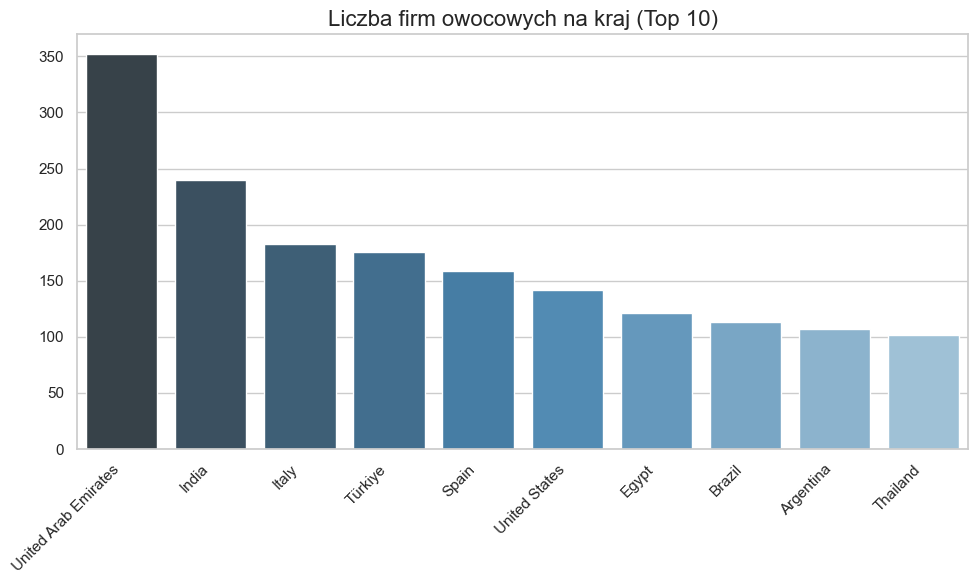

In [12]:
top_10_countries = df['Country'].value_counts().head(10).index

df_top_10 = df[df['Country'].isin(top_10_countries)]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Country', data=df_top_10,
              palette=sns.color_palette("Blues_d", len(top_10_countries))[::-1],
              order=top_10_countries)

plt.title('Liczba firm owocowych na kraj (Top 10)', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:
df.to_excel('gulfood.xlsx')